Input Directory: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams
Output Directory: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams_output
File: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams\A1H1_H2O_2_0_147cm_14400s_unwarped.gfrm
Beam center information not found in metadata.
Using Beam Center: (1030, 1040)


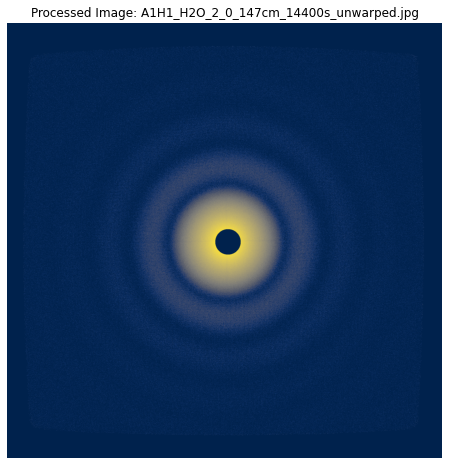

File: C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams\B2H1_H2O_2_0_147cm_14400s_unwarped.gfrm
Beam center information not found in metadata.
Using Beam Center: (1030, 1040)


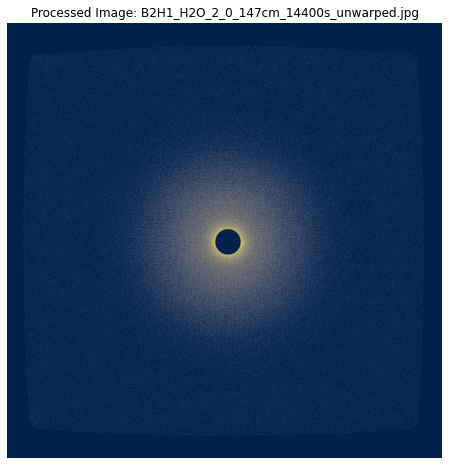

In [6]:
## Small-Angle X-ray Scattering ##

## .gfrm to .tiff Converter (Version 2.2) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 24.06.2024 ##


import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import fabio

def convert_gfrm_to_jpg(input_dir, output_dir, mask_diameter=50, beam_center=None):
    # File extension to search for
    input_file_extension = '.gfrm'

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Search for .gfrm files in the specified input directory
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(input_file_extension):
                # Create the absolute path of the input file
                input_file_path = os.path.join(root, file)

                try:
                    # Open the .gfrm file using fabio
                    gfrm_image = fabio.open(input_file_path)

                    # Print information about the selected file
                    print(f"File: {input_file_path}")

                    # Get the beam center from metadata if available
                    if hasattr(gfrm_image.header, 'Center_1') and hasattr(gfrm_image.header, 'Center_2'):
                        beam_center_file = (int(gfrm_image.header['Center_1']), int(gfrm_image.header['Center_2']))
                        print(f"Initial Beam Center from file: {beam_center_file}")
                    else:
                        beam_center_file = None
                        print("Beam center information not found in metadata.")

                    # Use user-defined beam center if provided, else use file value
                    if beam_center is None:
                        beam_center = beam_center_file

                    # Print the final beam center
                    print(f"Using Beam Center: {beam_center}")

                    if beam_center is not None:
                        # Create a mask to mask the central beam
                        data = gfrm_image.data
                        Y, X = np.ogrid[:data.shape[0], :data.shape[1]]
                        distance = np.sqrt((X - beam_center[1])**2 + (Y - beam_center[0])**2)
                        mask = distance <= (mask_diameter / 2)

                        # Set the masked region to black (0 intensity)
                        data[mask] = 0

                        # Apply logarithmic scaling
                        data = np.log1p(data)

                        # Normalize the data to the range 0-1
                        min_val = np.min(data)
                        max_val = np.max(data)
                        normalized_data = (data - min_val) / (max_val - min_val)

                        # Apply the darker blue-red-yellow color map
                        custom_colormap = plt.cm.get_cmap('cividis')
                        colored_image = custom_colormap(normalized_data)

                        # Convert to 8-bit per channel
                        colored_image = (colored_image[:, :, :3] * 255).astype(np.uint8)

                        # Save as .jpg using Pillow
                        output_file_name = f"{os.path.splitext(file)[0]}.jpg"
                        output_file_path = os.path.join(output_dir, output_file_name)
                        Image.fromarray(colored_image).save(output_file_path)

                        # Display the image (optional) with larger size
                        plt.figure(figsize=(10, 8))
                        plt.imshow(colored_image)
                        plt.title(f"Processed Image: {output_file_name}")
                        plt.axis('off')
                        plt.show()

                except Exception as e:
                    print(f"An error occurred: {e}")

# Example usage of the function
input_directory = "C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams"
output_directory = "C:/Users/Dimitris/Desktop/X23_0028_MetrINo-Data Analysis new/Diagrams_output"

# Convert Windows paths to POSIX paths for compatibility
input_directory = pathlib.PureWindowsPath(input_directory).as_posix()
output_directory = pathlib.PureWindowsPath(output_directory).as_posix()

print(f"Input Directory: {input_directory}")
print(f"Output Directory: {output_directory}")

# User-defined beam center (None means use file value)
beam_center = (1030, 1040)
mask_diameter = 120  # User-defined mask diameter

# Convert .gfrm to .jpg with user-defined beam center and mask diameter
convert_gfrm_to_jpg(input_directory, output_directory, mask_diameter=mask_diameter, beam_center=beam_center)



